In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


df = pd.read_csv('drive/MyDrive/datasets/pizza_sales.csv')
df = df[['pizza_size', 'unit_price', 'pizza_category', 'pizza_ingredients', 'quantity']].dropna()

X = df[['pizza_size', 'unit_price', 'pizza_category', 'pizza_ingredients']]
y = df['quantity']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(transformers=[
    ('size', OneHotEncoder(), ['pizza_size']),
    ('category', OneHotEncoder(), ['pizza_category']),
    ('ingredients', TfidfVectorizer(), 'pizza_ingredients')
], remainder='passthrough')

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

📉 MAE: 0.04
📈 RMSE: 0.15
📊 MAPE: 2.86%
✅ Accuracy (оцінка у відсотках): 97.14%


<ipython-input-14-27f64b7b84cb>:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


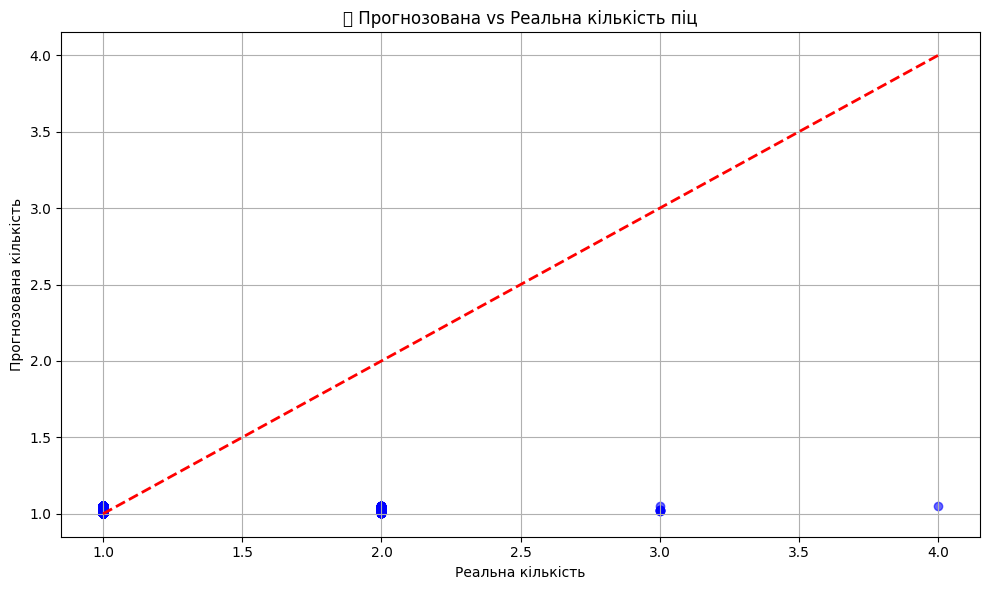

In [14]:
import numpy as np
import matplotlib.pyplot as plt
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = (abs(y_test - y_pred) / y_test).mean() * 100

accuracy_percent = 100 - mape

print(f"📉 MAE: {mae:.2f}")
print(f"📈 RMSE: {rmse:.2f}")
print(f"📊 MAPE: {mape:.2f}%")
print(f"✅ Accuracy (оцінка у відсотках): {accuracy_percent:.2f}%")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальна кількість')
plt.ylabel('Прогнозована кількість')
plt.title('📊 Прогнозована vs Реальна кількість піц')
plt.grid(True)
plt.tight_layout()
plt.show()